# Code Appendix

## Getting the Data

From the Command Line:

rsync --verbose --recursive rsync://78.46.86.149:873/dnmarchives/ ./dnmarchives/
tar xf grams.tar.xz

git add grams

git commit -m 'Data'

git push

In [1]:
import numpy as np
import pandas as pd
from os import listdir
from datetime import datetime as dt
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline
import imageio
import bokeh.io
import time
import nltk
import nltk.corpus
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotnine import *

# Agora from Grams

In [2]:
# gets folders containing agora.csv
def get_agora_folders():
    dirs = listdir("grams")
    try:
        dirs.remove('.DS_Store')
    except:
       None 

    dirs = ["grams/" + date for date in dirs if date != '2014-06-11-2']
    absolute_files = [date + "/" + i for date in dirs for i in listdir(date) if i == 'Agora.csv']
    absolute_files.sort()
    return absolute_files

agora_files = get_agora_folders()


def make_df_for_market(path):
    """
        path is the path to the agora csv. 
        returns the dated csv of information.
    """
    df = pd.read_csv(path)
    df['date'] = path
    df = df.drop(['hash', 'market_name','item_link', 'image_link', 'add_time', 'Unnamed: 10'], axis = 1)
    df['date'] = df['date'].str.replace("[^(\d+\-\d+\-\d+)]", "")
    df['date'] = pd.to_datetime(df['date'])
    df.columns = ['Vendor', 'Price', 'Item', 'Item Description', 'Origin', 'Date']
    df['Category'] = None
    df = df[['Category', 'Vendor', 'Item', 'Item Description', 'Price', 'Origin', 'Date']]
    df = df.drop_duplicates() 
    return df

# data for the first date
gram = make_df_for_market(agora_files[0])
gram.head(20)

,Category,Vendor,Item,Item Description,Price,Origin,Date
0,None,\n,Hacked Bitcoin Mining Cloudmining 500Gh s Anon...,Hacked Bitcoin Cloud Mining 0 25BTC Week for 2...,0.0,NaN,2014-06-09
1,None,\n,Hacked Bitcoin Mining Cloudmining 10Gh s Anony...,This is a Sample to test my service per Accoun...,0.0,NaN,2014-06-09
2,None,\n,Hacked Bitcoin Mining Cloudmining 1Th s Anonymous,Hacked Bitcoin Cloud Mining 0 5BTC Week for 24...,0.0,NaN,2014-06-09
3,None,\n,Fullz with efile pin,Selling usa fullz with efile pin. These infos ...,0.0,NaN,2014-06-09
4,None,\n,0 AGI FULLZ,I have lots of usa fullz with Zeros AGI ie..th...,0.0,NaN,2014-06-09
5,None,\n,HACKED Girls Webcams Private Videos Pics,This pack contains REAL videos and pictures fr...,0.0,World,2014-06-09
6,None,\n,Tax refund tutorial,This is the best starter kit for ppl who are n...,0.0,NaN,2014-06-09
7,None,\n,March Pharma Dbol Danabol Blue Hearts 10MG x 1...,Genuine March Pharma Danabol. Description Dana...,0.0,NaN,2014-06-09
8,None,\n,Novartis Ritalin 10mg IR crushable Original Br...,Original Ritalin 10mg pills. Can be crushed an...,0.0,NaN,2014-06-09
10,None,Australia,Ministry of Steroids DECA 200mg ml 10ML,DECA 200mg x 10ml multi use vial We are an aut...,0.0,Australia,2014-06-09


# Agora from Kaggle

In [4]:
def kaggle_agora_df(path):
    
    '''This function is specific to the Kaggle Agora data. Thus, it takes in a file path to the Kaggle data and returns
    the dataset in the form of a dataframe with the correct data types for each column.'''

    df = pd.read_excel(path)
    
    # Readjust the columns
    df.columns = ['Vendor', 'Category', 'Item', 'Item Description', 'Price', 'Origin', 'Destination', 'Rating', 'Remarks']
    df = df.drop(df.columns[-1], axis = 1)
    
    df = df[['Category', 'Vendor', 'Item', 'Item Description', 'Price', 'Origin', 'Destination', 'Rating']]

    # Resolve issues due to shifted columns
    df['Origin'].fillna('', inplace = True)
    df.loc[df['Origin'].str.contains('BTC')] = 'None'
    
    # Strip meaningless characters in 'Origin' column
    df.loc[df['Origin'].str.contains('\)'), 'Origin'] = 'None'
    df.Origin.where(~df.Origin.str.contains('Undeclared'), 'Undeclared', inplace = True)

    # there are occasional ratings of [0 deals] which indicates insufficient deals to provide a concrete rating
    # replace strings containing 'deals' with NaN
    df['Rating'].fillna('', inplace = True)
    df.Rating.where(~df.Rating.str.contains('deals'), np.nan, inplace = True)
    
    # Strip unecessary characters in order to convert columns to appropriate type
    rate = pd.DataFrame(df['Rating'])
    df['Rating'] = rate['Rating'].str.replace("/5|[^(\d{1}\.\d{2-3})$]", "")
    df['Rating'] = pd.to_numeric(df['Rating'])

    price = pd.DataFrame(df['Price'])
    df['Price'] = price['Price'].str.replace("[^(\d+\.\d+)]", "")
    df.loc[df['Price'] == ''] = np.nan
    df['Price'] = pd.to_numeric(df['Price'])

    df = df[~df.duplicated(keep = False)]
    df = df.reset_index(drop = True)

    df = df.replace('', np.nan, regex=True)
    df = df.replace('None', None, regex=True)
    
    return df

path = './dark-net-marketplace-drug-data-agora-20142015/Agora.xlsx'
agora = kaggle_agora_df(path)
agora[:20]

,Category,Vendor,Item,Item Description,Price,Origin,Destination,Rating
0,Services/Hacking,CheapPayTV,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.050270,Torland,NaN,4.960
1,Services/Hacking,CheapPayTV,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152420,Torland,NaN,4.960
2,Services/Hacking,KryptykOG,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000,Torland,NaN,4.930
3,Services/Hacking,cyberzen,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019017,NaN,NaN,4.890
4,Services/Hacking,businessdude,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018,Torland,NaN,4.880
5,Services/Hacking,Hackyboy,DDOS ATTACK SERVICE,New service available : Take down all websites...,0.030109,Torland,NaN,4.920
6,Services/Hacking,businessdude,ATM HACKING TUTORIAL,Step by Step guide and Manuals to hack ATMs ...,0.033176,NaN,NaN,4.880
7,Services/Hacking,CheapPayTV,CALL/SMS verification service!,Need to register an account with sms verificat...,0.012617,Torland,NaN,4.960
8,Services/Hacking,toysoldiers,Mac & windows address changer,- Comes with complete database to randomly cho...,0.009336,Torland,NaN,4.940
9,Services/Hacking,cyberzen,WiFi Hacking,-Hacking WEP/WPA/WPA2 the glory of WPS -Hacki...,0.027091,NaN,NaN,4.890


## Categorizing Data

__Initial Process__

In [5]:
def make_df_for_market(market, year_month = ""):
    """
        Market is the market names. It should end in .csv
        year_month is optional. 
        If left empty it will read all the files fo the given market in the grams folder.
        For larger markets year_month should not be left empty because of the sheer volume
        of data those files contain.
    """
    dirs = listdir("grams")
    try:
        dirs.remove('.DS_Store')
    except:
       None 

    dirs = ["grams/" + x for x in dirs]
    if year_month:
        absolute_files = [x + "/" + i for x in dirs for i in listdir(x) if i == market if year_month in x]
    else:
         absolute_files = [x + "/" + i for x in dirs for i in listdir(x) if i == market]
    df = pd.read_csv(absolute_files[0])
    df['date'] = absolute_files[0]
    if len(absolute_files) > 1:
        for i in np.arange(1,len(absolute_files)):
            new_df = pd.read_csv(absolute_files[i])
            new_df['date'] = absolute_files[i]
            df = df.append(new_df)

    df = df.drop(['hash', 'item_link', 'image_link', 'add_time', 'Unnamed: 10'], axis = 1)
    # get date and convert to appropriate type
    df['date'] = df['date'].str.replace("[^(\d+\-\d+\-\d+)]", "")
    df['date'] = df['date'].str.replace("1776", "")
    df['date'] = pd.to_datetime(df['date'])
    df.columns = ['Market', 'Vendor', 'Price', 'Item', 'Item Description', 'Origin', 'Date']
    df['Destination'] = None
    df['Rating'] = None
    df['Category'] = None
    df = df[['Market', 'Category', 'Vendor', 'Item', 'Item Description', 'Price', 'Origin', 'Destination', 'Rating', 'Date']]
    return df

# Used a different market for testing
dream_df = make_df_for_market("Dream.csv")

# Seeing the most common words in the product titles
# From this we can see what the market mainly sells.

stopwords = nltk.corpus.stopwords.words("english")

dream_df['Item'] = dream_df['Item'].apply(lambda x: re.sub(r"\d", "", x))
items = dream_df['Item'].apply(lambda x: x.lower())

giant_text = ""
for x in items:
    giant_text += x

more_stopwords = ['mg', 'x', 'g', 'free', 'gram', 'pure',
                  'quality', 'grams', 'gr', 'hi', 'uk', 
                 'top', 'haze', 'account', 'dutch', 'premium',
                 'grade', 'uncut', 'ml', 'high', 'super', 'hq'] 

for x in more_stopwords:
    stopwords.append(x)

giant_text = re.split("\W+", giant_text)
giant_text = [w for w in giant_text if w not in stopwords]

fq = nltk.FreqDist(w for w in giant_text if w.isalnum())
pd.DataFrame(fq.most_common(25))

,0,1
0,mdma,7743
1,pills,6257
2,cocaine,5304
3,xtc,3930
4,hash,2871
5,lsd,2771
6,crystal,2707
7,speed,2578
8,ug,2531
9,aaa,2155


In [15]:
## DRUG Categorization

# Below here is the test area for categorizing descriptions as drugs

def is_category(desc, cat_words, category):
    l = [d in str(desc).lower() for d in cat_words]
    if sum(l): return category
    else: return 'Misc'
    

drug_words = ['mdma', 'pills', 'cocaine', 'xtc', 'hash',
             'lsd', 'crystal', 'speed', 'xanax', 'mg',
              'gram', 'caps' , "oxycodone", "acetylfentanyl",
              "fentanyl", "weed", "heroin", "fishscale", "crack",
              "vape ice", "valium", "ml", "promethazine", "flake",
              "snort", "kush", "1g", "2g", "3g", "4g", "5g", "kg", "meth", "coke",
             "pharm", "strain", "purity", "tablet", "clonazolam",
             "dope", "candy", "aaa", "skunk", "drug", "bar", "0g"]

is_category(dream_df['Item'][0], drug_words, "Drugs")
category = dream_df['Item Description'].apply(lambda x: is_category(x, drug_words, "Drugs"))
dream_df['Category'] = category

# Prints how much of the data was categorized
print(len(np.where(dream_df['Category'] == 'Drugs')[0]) / len(dream_df)) 
dream_df.iloc[np.where(dream_df['Category'] == 'Misc')[0]]




hacking_words = ['netflix', 'cc ', 'credit card', 'walmart', 'facebook',
                'hulu', 'gift card', 'generator', 'giftcard', "porn", 
                "brazzers", "twisty", "premium account"]
drug_words = ['mdma', 'pills', 'cocaine', 'xtc', 'hash',
             'lsd', 'crystal', 'speed', 'xanax', 'mg',
              'gram', 'caps' , "oxycodone", "acetylfentanyl",
              "fentanyl", "weed", "heroin", "fishscale", "crack",
              "vape ice", "valium", "ml", "promethazine", "flake",
              "snort", "kush", "meth", "coke",
             "pharm", "strain", "purity", "tablet", "clonazolam", "heroin"
             "dope", "candy", "aaa", "skunk", "drug", "bar", 'opiode']

cat_dict = {"Hacking/Services" : hacking_words, "Drugs": drug_words}

def categorize_text(text, cat_dict):
    drugs = [bool(re.search(d, str(text).lower())) for d in cat_dict['Drugs']]
    hacks = [h in str(text).lower() for h in cat_dict['Hacking/Services']]
    if sum(drugs) > sum(hacks): return 'Drugs'
    if sum(drugs) < sum(hacks): return 'Hacking/Services'
    else: return 'Misc'

category = dream_df['Item'].apply(lambda x: categorize_text(x, cat_dict))
dream_df['Category'] = category

num_drugs = dream_df['Category'].value_counts()[0]
num_hacks = dream_df['Category'].value_counts()[2]

print( "Proportion of items categorized as Drugs is: " + str(num_drugs / len(dream_df)))
print( "Proportion of items categorized as Hacking/Services is: " + str(num_hacks / len(dream_df)))
print( "Overall Proportion of items categorized is: " + str((num_hacks + num_drugs )/len(dream_df)))




hack_bank = ['youtube', 'vpn', 'vcc', 'amazon', 'hbo',
            'bank', 'card', 'custom', 'custum', 'cc', 'cvv',
            'password', 'dns', 'phone', 'template', 'kindle', 
            'facebook', 'address', 'email', 'domino', 'bitcoin',
            'cash', 'network', 'wifi', 'bill', 'fake', 'how', 'paypal',
            'computer', 'trojan', 'sql', 'window', 'app', 'ddos',
             'rat', 'hack', 'anti', 'data', 'linux', 'key', 'online',
            'web', 'net', 'visa', 'dump', 'bin', 'website', 'android',
            'exploit', 'money', 'bot', 'netflix', 'malware', 'adsense',
            'adword', 'security', 'download', 'file', 'tutorial', 'free',
            'microsoft', 'firewall', 'bypass', 'create', 'disable', 'adobe',
            'dual', 'spoof', 'spyware', 'scam']





def categorize_text(text, cat_dict):
    drugs = [bool(re.search(d, str(text).lower())) for d in cat_dict['Drugs']]
    hacks = [h in str(text).lower() for h in cat_dict['Hacking/Services']]
    if sum(drugs) > sum(hacks): return 'Drugs'
    if sum(drugs) < sum(hacks): return 'Hacking/Services'
    else: return 'Misc'

dream_df['Category'] = dream_df['Item Description'].apply(lambda x: categorize_text(x, cat_dict))
dream_df['Category'].value_counts()





def categorize_text(text):
    drugs = [bool(re.search(d, str(text).lower())) for d in drug_words]
    hacks = [h in str(text).lower() for h in hack_bank]
    if sum(drugs): return 'Drugs'
    if sum(hacks): return 'Hacking/Services'
    else: return 'Misc'

dream_df['Category'] = dream_df['Item Description'].apply(lambda x: categorize_text(x))
dream_df['Category'].value_counts()




agora_df = make_df_for_market('Agora.csv', '2015-02')
agora_df['Category'] = agora_df['Item Description'].apply(lambda x: categorize_text(x))
agora_df['Category'].value_counts()



(agora_df['Category'].value_counts()[0] + agora_df['Category'].value_counts()[1])/ agora_df.shape[0]

0.6733594515181195
Proportion of items categorized as Drugs is: 0.5175425650383052
Proportion of items categorized as Hacking/Services is: 0.03789596554546308
Overall Proportion of items categorized is: 0.5554385305837682


0.8264345960704013

__Getting Word Banks__

In [16]:
## These are functions that are necessary for performing the functions below
# These First 4 are for organzining Grams Data

drug_bank = ["(\d*g)", "(\d\s*g)", "(\d*g)", "(\d\s*g)",
             "(\d\s*ml)", "(\d*ml)", "(\d*ml)", "(\d\s*ml)",
              "(\d\s*mcu)", "(\d*mcu)", "(\d*mcu)", "(\d\s*mcu)", 'seed',
              "(\d\s*oz)", "(\d*oz)", "(\d*oz)", "(\d\s*oz)", "cannabis"
              "(\d\s*ounce)", "(\d*ounce)", "(\d*ounce)", "(\d\s*ounce)",
              "tab", 'crack', 'xtc', 'weed', 'diesel', 'kilo', 'heroin',
              'cocaine', 'mdma', 'pill', 'cocaine', 'xtc', 'hash', 'cap'
              'lsd', 'crystal', 'speed', 'xanax', 'mg', 'syrup', 'bud',
              'gram', 'caps' , "oxycodone", 'mushroom', 'amphetamine',
              "fentanyl", "weed", "heroin", "fishscale", "crack", 'neurobion'
              "vape ice", "valium", "ml", "promethazine", "flake", 'dihydrocodeine'
              "snort", "kush", "meth", "coke", 'ambien', 'dmt', 'jintropin'
             "pharm", "strain", "purity", "tablet", "clonazolam", "heroin",
             "dope", "candy", "aaa", "skunk", "drug", "bar", 'opiode'
             ]

serv_bank = ['youtube', 'vpn', 'vcc', 'amazon', 'hbo', 'tor', 'account',
            'bank', 'card', 'custom', 'custum', 'cc', 'cvv', 'get', 'http'
            'password', 'dns', 'phone', 'template', 'kindle','porn',
            'facebook', 'address', 'email', 'domino', 'bitcoin', 'lifetime'
            'cash', 'network', 'wifi', 'bill', 'fake', 'how', 'paypal',
            'computer', 'trojan', 'sql', 'window', 'app', 'ddos', 'service'
             'rat', 'hack', 'anti', 'data', 'linux', 'key', 'online', 'best'
            'web', 'net', 'visa', 'dump', 'bin', 'website', 'android', 'us'
            'exploit', 'money', 'bot', 'netflix', 'malware', 'adsense',
            'adword', 'security', 'download', 'file', 'tutorial', 'free',
            'microsoft', 'firewall', 'bypass', 'create', 'disable', 'adobe',
            'dual', 'spoof', 'spyware', 'scam', 'information', 'hulu']

guns_bank = ['pistol', 'ammunition', 'ak47', 'silencer', 'ammo', 'melee',
            '9mm', '5.6mm', 'rpg','revolver', 'gun', '357', 'steel', 
            'pump', 'gun', 'millimeter', 'uzi', 'shotty', 'sawed-off',
            'glock', 'escrow', 'blade', 'stealth', 'magazine', 'mags',
            'knife', 'stun', 'handle', 'caliber', 'barrel', 'weapon',
            'luger', 'round', 'voltage', 'compact', 'nato', 'microtech'
            'carry', 'dusters', 'conceal', 'rifle', 'pulse', 'action']

fake_bank = ['â', 'case', 'material', 'watch', 'steel' ,' stainless',
             'information', 'diameter', 'brand', 'thickness', 'replica','band', 
            'color', 'size', 'wear', 'rolex', 'passport', 'listing', 'id',
            'leather', 'business', 'fake', 'scanned', 'free', 'authentic',
            'counterfeit', 'original', 'hustlegod', 'flashlight', 'shock',
            'sunglass', 'armani', 'vuitton', 'forged', 'password', 'document'] 


# These are for simplifying the categories in the Kaggle Data 
kaggle_drugs = ["drug", "tobacco", "chemicals"]
kaggle_serv = ["services", "data", "btc", "jewelry"]
kaggle_guns = ["weapon"]
kaggle_fake = ["counterfeits", "forgeries"]


def categorize_text(text, drug_bank, hack_bank, guns_bank, fake_bank):
    """
        This is the function to categorize items into either:
            Drugs, Services, Guns/Weapons, Counterfeits or Misc.
        You will need the word banks, above to to make this function work.
    """
    other_bank = ['info', 'other', 'ebook', 'guide']
    
    drugs = [bool(re.search(d, str(text).lower())) for d in drug_bank]
    guns = [bool(re.search(g, str(text).lower())) for g in guns_bank]
    hacks = [bool(h in str(text).lower()) for h in hack_bank]
    fake = [bool(f in str(text).lower()) for f in fake_bank]
    other = [bool(o in str(text).lower()) for o in other_bank]
    
    if sum(other) > sum(drugs): 
        if sum(other) > sum(fake):
            if sum(other) > sum(hacks):
                if sum(other) >= sum(drugs):
                    return 'Misc.'
                else:
                    return 'Drugs'
            else:
                return 'Services'
        else:
            return 'Counterfeits'
    elif sum(guns) > sum(drugs): 
        return 'Weapons'
    elif sum(fake) > sum(drugs): 
        return 'Counterfeits'
    elif sum(drugs) >= sum(hacks): 
        return 'Drugs'
    elif sum(hacks) > sum(guns): 
        return 'Services'
    else: 
        return 'Misc.'

## Checking the strength of our categorization algorithim



In [17]:
# Kaggle's Initial Categories
agora_cats = pd.DataFrame(agora['Category'].value_counts())
agora_cats = agora_cats.reset_index()
# 91 was the start of the category names
agora_cats.loc[91:, :]

,index,Category
91,Info/eBooks/Psychology,40
92,Drugs/Psychedelics/Salvia,37
93,Drugs/Barbiturates,30
94,Drug paraphernalia/Injecting equipment/Other,30
95,Tobacco/Paraphernalia,27
96,Info/eBooks/Politics,26
97,Info/eBooks/Philosophy,25
98,Drug paraphernalia/Injecting equipment/Needles,15
99,Weapons/Fireworks,14
100,Info/eBooks/Aliens/UFOs,10


In [18]:
df = agora.copy()
categories = df['Item Description'].apply(lambda x: categorize_text(x, drug_bank, serv_bank, guns_bank, fake_bank))
categories.value_counts()

Drugs           100522
Services          5082
Counterfeits      3557
Weapons            451
Misc.               70
Name: Item Description, dtype: int64

In [19]:
actual_categories = df['Category'].apply(lambda x: categorize_text(
    x, kaggle_drugs, kaggle_serv, kaggle_guns, kaggle_fake
))
df['Simple Category'] = actual_categories
actual_categories.value_counts()

Drugs           94988
Misc.            5438
Services         5181
Counterfeits     3419
Weapons           656
Name: Category, dtype: int64

In [20]:
num_correct = [None] * len(categories)
for i in range(0,len(num_correct)):
    num_correct[i] = categories[i] == actual_categories[i]

sum(num_correct) / len(num_correct)
# about 87.6% accurate

0.8760872340037563

## Sub-categories

In [23]:
# add more sub-categories to dataframe
agora['Category'] = agora['Category'].astype(str)
cat = [a[0] for a in agora['Category'].str.split("/")]
subcat = [w[1] if len(w) > 1 else w[0] + ": Misc" for w in agora['Category'].str.split("/")]
subsubcat = [w[2] if len(w) > 2 else  w[1] + ": Misc" if len(w) > 1 else w[0] + ": Misc" for w in agora['Category'].str.split("/")] 

d = { 
    'Vendor': agora['Vendor'],
    'Category': cat,
    'Sub-Category': subcat,
    'Sub-Sub-Category': subsubcat,
    'Item': agora['Item'],
    'Item Description': agora['Item Description'],
    'Price': agora['Price'],
    'Rating': agora['Rating']
}

agora_sub_cat = pd.DataFrame(data = d)

agora_sub_cat['Category'].unique()


array(['Services', 'Drugs', 'Forgeries', 'Tobacco', 'Counterfeits',
       'Data', 'Information', 'Electronics', 'Drug paraphernalia',
       'Other', 'Jewelry',
       'the Body Bags  shotty  and Mac make-up To: Kind Hearts and Gentle People',
       'Weapons', 'Info',
       'home of the Body Bags  shotty  and mag  Kind Hearts and Gentle People',
       'Chemicals', '0.12780125125 BTC', '0.1905617980645162 BTC',
       'the Body Bags  shotty  and mag To: Kind Hearts and Gentle People'],
      dtype=object)

In [24]:
# Apply categorization algorithm 
# Simplifies certain categories such as:
#   Tobacco, Drugs, and Drug Paraphenalia all gets lumped into Drugs.
agora_sub_cat['Category'] = agora_sub_cat['Category'].apply(
    lambda x: categorize_text(x, kaggle_drugs, kaggle_serv, kaggle_guns, kaggle_fake)
)
agora_sub_cat['Category'].unique()

array(['Services', 'Drugs', 'Counterfeits', 'Misc.', 'Weapons'],
      dtype=object)

In [26]:
# PLOT FOR TOP 20 ACTIVE, HIGHEST RATED VENDORS
vendor_rate = pd.read_csv("vendor_avg_ratings.csv")

high_rated = vendor_rate.loc[vendor_rate['index'] == 'High Rated, Active Vendor']
topseller_list = list(high_rated['Vendor'])

top20 = agora_sub_cat[agora_sub_cat.Vendor.isin(topseller_list)]
notTop = agora_sub_cat[~agora_sub_cat.Vendor.isin(topseller_list)]
top20["Sub-Category"].value_counts()

Cannabis               1733
eBooks                 1306
Ecstasy                1156
Watches                 817
RCs                     568
Psychedelics            524
Other: Misc             469
Accounts                408
Stimulants              339
Jewelry: Misc           282
Other                   192
Money                   188
Opioids                 173
Benzos                  157
Containers              155
Clothing                147
Dissociatives           142
Guides                  142
Pirated                 140
Electronics: Misc       124
Stashes                 113
Hacking                 112
Physical documents      107
Advertising             103
Software                 72
Grinders                 71
Paper                    51
Pipes                    24
Scales                   24
Injecting equipment      23
Chemicals: Misc          12
Prescription             10
Accessories               9
Paraphernalia             7
Weight loss               7
Barbiturates        

In [27]:
# get the post counts for each sub-category for the top 20 vendors
top20_counts = pd.DataFrame(top20['Sub-Category'].value_counts())
top20_counts = top20_counts.reset_index()
top20_counts.columns = ['Sub-Category', 'Count']

top20_df = pd.merge(top20_counts, top20, on = 'Sub-Category')
top20_df['Vendor'] = 'Top 20 Vendor'

# get the post counts for each sub-category for other vendors
notTop_counts = pd.DataFrame(notTop['Sub-Category'].value_counts())
notTop_counts = notTop_counts.reset_index()
notTop_counts.columns = ['Sub-Category', 'Count']

notTop_df = pd.merge(notTop_counts, notTop, on = 'Sub-Category')
notTop_df['Vendor'] = 'Rest of Vendors'

# get only the following columns: "Sub-Category", "Category", "Vendor", "Count"
df = top20_df.iloc[:, [0,1, 2, 3]]
df2 = notTop_df.iloc[:, [0,1, 2, 3]]

# combine the dataframes
comb_df = pd.concat([df, df2])

# drop duplicates
comb_df = comb_df.drop_duplicates()

#get the top 3 highest count of posts for each category
comb_df = comb_df.sort_values('Count', ascending = False).groupby(['Vendor', 'Category']).head(3)
comb_df = comb_df.reset_index(drop = True)

comb_df.sort_values(["Vendor", "Category"])
comb_df['Comb-Category'] = [comb_df['Category'][i] + ": " + comb_df['Sub-Category'][i] for i in range(0, len(comb_df['Category']))]
comb_df.head(20)

,Sub-Category,Count,Vendor,Category,Comb-Category
0,Cannabis,29428,Rest of Vendors,Drugs,Drugs: Cannabis
1,Ecstasy,13827,Rest of Vendors,Drugs,Drugs: Ecstasy
2,Stimulants,12532,Rest of Vendors,Drugs,Drugs: Stimulants
3,eBooks,1780,Rest of Vendors,Misc.,Misc.: eBooks
4,Cannabis,1733,Top 20 Vendor,Drugs,Drugs: Cannabis
5,Money,1680,Rest of Vendors,Counterfeits,Counterfeits: Money
6,Money,1680,Rest of Vendors,Services,Services: Money
7,eBooks,1306,Top 20 Vendor,Misc.,Misc.: eBooks
8,Other,1267,Rest of Vendors,Counterfeits,Counterfeits: Other
9,Other,1267,Rest of Vendors,Services,Services: Other


# Top 20 Vendor vs Rest of Vendors Activity in Different Categories


In [28]:
def vendor_trace(df, vendor):
    
    '''
    
    This function was made to generalize the creation of
    traces since  the code to make them is almost identical
    between traces.
    
    This function takes in a dataframe with a Comb-Category
    Vendor, and Count column. It then creates a plot.ly trace 
    for the type of vendor and returns said trace.
    
    '''
    
    temp_df = df[df['Vendor'] == vendor]
    trace = go.Bar(
        x = temp_df['Comb-Category'],
        y = temp_df['Count'],
        name = vendor
    )
    return trace

traces = [vendor_trace(comb_df, v) for v in comb_df['Vendor'].unique()]

layout = go.Layout(
    barmode='stack',
    
    title = 'Top 20 Vendor vs Rest of Vendors Activity in Different Categories', 
    
    xaxis=dict(
        title= 'Categories and Sub-Categories',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        
        showticklabels=True,
        tickangle=25,
        tickfont=dict(
            size= 10
        )
    ),
    
    yaxis = dict(
        title = 'Number of Postings',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        
        showticklabels=True,
    )
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')
# plotly.offline.plot(fig, filename='top20vsrest.html')

/Users/Andy/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Number of Items Postings by Sub-Category

In [60]:
def sub_cat_df(cat, df):
    
    '''
        
    The intent of this function is to get the counts
    of observations for each sub-category within a 
    given category.
    
    This function takes in a category name and
    a dataframe with columns: Category and 
    Sub-Category. It then takes the counts of
    all of the Sub-Categories using value_counts(),
    formats the result as a df, adds a column
    for the initial category, and outputs the result.
    
    '''
    
    cat_df = pd.DataFrame(df[df['Category'] == cat]['Sub-Category'].value_counts())
    cat_df = cat_df.reset_index()
    cat_df.columns = ['Sub Category', 'Count']
    cat_df['Category'] = cat
    return cat_df

categories = agora_sub_cat['Category'].unique()
sub_cats = sub_cat_df(categories[0], agora_sub_cat)

for i in categories[1:len(categories)]:
    sub_cats = pd.concat( [sub_cats, sub_cat_df(i, agora_sub_cat)])
    
sub_cats = sub_cats.reset_index(drop = True)

sub_cats = sub_cats.drop([9, 10, 35, 36 ,37]) # dropping really unhelpful Sub categories
sub_cats

,Sub Category,Count,Category
0,Money,1481,Services
1,Accounts,1233,Services
2,Pirated,529,Services
3,Other,487,Services
4,Hacking,453,Services
5,Jewelry: Misc,418,Services
6,Software,356,Services
7,Advertising,132,Services
8,Travel,90,Services
11,Cannabis,31161,Drugs


In [61]:
def subcategory_trace(df, category):
    
    '''   
    This function takes in a dataframe with a Comb-Category
    Vendor, and Count column. It then creates a plot.ly trace 
    for the type of vendor and returns said trace.
    
    This function was made to generalize the creation of
    traces since  the code to make them is almost identical
    between traces.
    
    ''' 
    
    trace = go.Bar(
        x = df[df['Category'] == category]['Sub Category'],
        y = df[df['Category'] == category]['Count'],
        name = category
    )
    return trace

traces = [subcategory_trace(sub_cats, c) for c in sub_cats['Category'].unique()]
layout = go.Layout(
    barmode='group',
    title = 'Number of Items Postings by Sub-Category', 
    
    xaxis=dict(
        title='Sub-Categories',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        
        showticklabels=True,
        tickangle=30,
        tickfont=dict(
            size= 10
        )
    ),
    
    yaxis = dict(
        title = 'Number of Postings',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        
        showticklabels=True,
    )
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='grouped-bar')
# plotly.offline.plot(fig, filename='subcatitems.html')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~aialba/0 or inside your plot.ly account where it is named 'grouped-bar'


/Users/Andy/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Top Vendor post activity over time


__This section tracks the activity of sellers for a single day and across a range of days.__

In [20]:
## These function can get the list of all vendors in the grams file and how many items they sell for a given day

def get_sellers(file): 
    """
        INPUT: a file path
        OUTPUT: a dataframe with cols['Vendor', 'Items Posted', 'Date']
        
        It gets a list of vendors for a file and then counts how 
        many listings they posted for a given day.
        
        It formats the above into a dataframe and also records 
        a the day of the data.
        
    """
    df = pd.read_csv(file, usecols = ['vendor_name'], engine = 'python', error_bad_lines = False)
    vendor = pd.DataFrame(df['vendor_name'].value_counts())
    vendor = vendor.reset_index()
    vendor['date'] = file
    vendor['date'] = vendor['date'].str.replace("[^(\d+\-\d+\-\d+)]", "")
    vendor['date'] = pd.to_datetime(vendor['date'])
    vendor.columns = ['Vendor', 'Items Posted', 'Date']
    return vendor

def get_all_sellers(files):
    
    """
        INPUT: a list of file paths
        OUTPUT: a dataframe with cols['Vendor', 'Items Posted', 'Date']
        
        This function applies the above function to a list of file paths.
        It then formats the collection of dataframes into one that can
        be used for analysis.

    """
    
    vendors = get_sellers(files[0])
    for i in files[1:]:
        temp = get_sellers(i)
        vendors = pd.concat([vendors, temp])
    return vendors            

In [21]:
### This is the run for the above functions.

### It gathered every vendor from every Agora file in the grams folder and how many posts they made for a given day.
start = time.time()
df = get_all_sellers(agora_files)
end = time.time()

print(end - start)

df[:10] 

Skipping line 22543: unexpected end of data


83.49084401130676


,Vendor,Items Posted,Date
0,fake,519,2014-06-09
1,mssource,470,2014-06-09
2,FREE,225,2014-06-09
3,Gotmilk,208,2014-06-09
4,captainkirk,207,2014-06-09
5,RXChemist,206,2014-06-09
6,Bigdeal100,148,2014-06-09
7,cyberzen,145,2014-06-09
8,RepAAA,139,2014-06-09
9,passman,119,2014-06-09


__This section can track the types of items that a seller sells based on our categorizer.__

In [22]:
def get_vendor_categories(df, vendor):
    
    """
        INPUT: 
            a dataframe with cols ['vendor_name', 'description' 'category'],
            name of a vendor in the dataframe
        OUTPUT: a dataframe with cols['category', 'items_listed', 'vendor_name']
        
        This function subsets the given dataframe by the vendor.
        It then takes the counts of the items said vendor sold
        for the given categories. 
        
        It formats the above as a dataframe and adds a column
        for the vendor name.
        
    """
    
    ven_df = pd.DataFrame(df[df['vendor_name'] == vendor]['category'].value_counts())
    ven_df = ven_df.reset_index()
    ven_df['vendor_name'] = vendor
    ven_df.columns = ['category', 'items_listed', 'vendor_name']
    
    return ven_df

def get_all_vendor_categories(df):
    
    """
        INPUT: a dataframe with cols ['vendor_name', 'description' 'category']
        OUTPUT: a dataframe with cols ['category', 'items_listed', 'vendor_name']

        This function gets a list of the vendor names in the given df.
        From there it iterates through the list and then uses the function:
                    get_vendor_categories
        to get a dataframe of the counts of items said vendor sold
        for a given category.
        
        It then formats the above dataframes into one.
    """
    
    vendors = df['vendor_name'].unique()
    new_df = get_vendor_categories(df, vendors[0])
    for i in vendors[1:]:
        temp_df = get_vendor_categories(df, i)
        new_df = pd.concat([new_df, temp_df])
    
    new_df = new_df.reset_index(drop = True)
    
    return new_df

def file_to_vendor_category(file):
    
    """
        INPUT: a filepath
        OUTPUT: a dataframe with cols ['category', 'items_listed', 'vendor_name', 'date']
        
        This function takes in a filepath and then makes a dataframe 
        with the vendor name and their item descriptions. It then 
        categorizes each row based on its item description. It then 
        saves the above into one data frame.
        
        With the above dataframe, it then uses the function:
                get_all_vendor_categories
        to format the dataframe into vendors and the counts
        of the types of items they sold. It then adds the 
        date to the dataframe.
        
    """
    
    df = pd.read_csv(file, usecols = ['vendor_name', 'description'], engine = 'python', error_bad_lines = False)
    df['category'] = df['description'].apply(lambda x:
                                             categorize_text(x, drug_bank, serv_bank, guns_bank, fake_bank))
    df = get_all_vendor_categories(df)
    df['date'] = file
    df['date'] = df['date'].str.replace("[^(\d+\-\d+\-\d+)]", "")
    df['date'] = pd.to_datetime(df['date'])
    df.columns = ['Category', 'Items Listed', 'Vendor', 'Date']

    return df

def all_file_to_vendor_category(files):
    
    """
        INPUT: a list of filepaths
        OUTPUT: a dataframe with cols ['category', 'items_listed', 'vendor_name', 'date']
        
        This function iterates over the list of files and makes 
        a dataframe for each file with the function:
                file_to_vendor_category
        
        It then combines all the dataframes into one.
    """
    
    df = file_to_vendor_category(files[0])
    for i in files[1:]:
        temp_df = file_to_vendor_category(i)
        df = pd.concat([df, temp_df])

    return df

In [23]:
### These are the runs for 2 of the functions above.

#The first is a run for one file.

start = time.time()

df = file_to_vendor_category(agora_files[0])

end = time.time()
print(end - start)

df[:20]

9.079082012176514


,Category,Items Listed,Vendor,Date
0,Drugs,7,\n,2014-06-09
1,Services,1,\n,2014-06-09
2,Drugs,2,\n,2014-06-09
3,Drugs,3,Australia,2014-06-09
4,Drugs,9,Canada,2014-06-09
5,Drugs,1,Sweden,2014-06-09
6,Drugs,13,USA,2014-06-09
7,Drugs,11,007,2014-06-09
8,Drugs,11,03welle,2014-06-09
9,Drugs,14,1dboladay,2014-06-09


In [24]:
print('Services: ' + str(sum(df[df['Category'] == 'Services']['Items Listed'])))
print('Drugs: ' + str(sum(df[df['Category'] == 'Drugs']['Items Listed'])))
print('Weapons: ' + str(sum(df[df['Category'] == 'Weapons']['Items Listed'])))
print('Counterfeits: ' + str(sum(df[df['Category'] == 'Counterfeits']['Items Listed'])))
print('Misc: ' + str(sum(df[df['Category'] == 'Misc']['Items Listed'])))

Services: 933
Drugs: 10009
Weapons: 99
Counterfeits: 508
Misc: 0


In [ ]:
#The second is a run for a list of files.
# this took around 50 min to run
start = time.time()

df = all_file_to_vendor_category(agora_files)

end = time.time()
print(end - start)

df

# save to file
# path = "/Users/Andy/Desktop/STA 141B/project-obeasts-ct/all_vendor_categories_new.csv"
# df.to_csv(path, index = False)

# df = pd.read_csv('all_vendor_categories_new.csv')

# print('Services: ' + str(sum(df[df['Category'] == 'Hacking/Services']['Items Listed'])))
# print('Drugs: ' + str(sum(df[df['Category'] == 'Drugs']['Items Listed'])))
# print('Weapons: ' + str(sum(df[df['Category'] == 'Guns/Weapons']['Items Listed'])))
# print('Counterfeits: ' + str(sum(df[df['Category'] == 'Counterfeits']['Items Listed'])))
# print('Misc: ' + str(sum(df[df['Category'] == 'Misc']['Items Listed'])))

__Selecting the top rated Vendors and low rated Vendors__

In [25]:
a = agora.groupby('Vendor').mean()
a = a.reset_index()

# lowest rated vendors are defined to have ratings 3.0 and under
bottom = a[a['Rating'] <= 3]
bttm_rated_list = list(bottom.Vendor)

# highest rated vendors are defined to have ratings 4.8 and over
top = a[a['Rating'] >= 4.8]
top_rated_list = list(top.Vendor)

# highest rated, most active sellers
high = agora[agora.Vendor.isin(top_rated_list)]
active = pd.DataFrame(high['Vendor'].value_counts())
active = active.reset_index()
active.columns = ['Vendor', 'Post Amount']
highsellers = pd.merge(top, active, on = 'Vendor')
high_active_sellers = highsellers.sort_values(['Post Amount', 'Rating'], ascending = False)
high_active_sellers = high_active_sellers.reset_index()
high_20 = high_active_sellers[:20]
high_20['index'] = 'High Rated, Active Vendor'

# lowest rated, most active sellers
low = agora[agora.Vendor.isin(bttm_rated_list)]
active = pd.DataFrame(low['Vendor'].value_counts())
active = active.reset_index()
active.columns = ['Vendor', 'Post Amount']
lowsellers = pd.merge(bottom, active, on = 'Vendor')
low_active_sellers = lowsellers.sort_values(['Post Amount', 'Rating'], ascending = False)
low_active_sellers = low_active_sellers.reset_index()
low_20 = low_active_sellers[:20]
low_20['index'] = 'Low Rated, Active Vendor'

# combine the dataframes
comb_df = pd.concat([high_20, low_20])
comb_df = comb_df.reset_index(drop = True)
comb_df.head(20)

# convert dataframe into CSV and save file
#comb_df.to_csv("vendor_avg_ratings.csv", encoding='utf-8', index = False)
#x = pd.read_csv("vendor_avg_ratings.csv")

/Users/family/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/family/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,index,Vendor,Price,Rating,Post Amount
0,"High Rated, Active Vendor",optiman,5.369511,4.961217,881
1,"High Rated, Active Vendor",sexyhomer,1.540295,4.983049,860
2,"High Rated, Active Vendor",mssource,5.785796,4.960368,823
3,"High Rated, Active Vendor",profesorhouse,0.812778,5.000000,804
4,"High Rated, Active Vendor",rc4me,3.171233,4.999753,648
5,"High Rated, Active Vendor",medibuds,2.321031,4.982421,604
6,"High Rated, Active Vendor",Bigdeal100,0.659398,4.960776,451
7,"High Rated, Active Vendor",captainkirk,0.003724,4.982396,447
8,"High Rated, Active Vendor",TheDigital,1.845008,4.850490,435
9,"High Rated, Active Vendor",OnePiece,0.019420,4.878047,430


## Interactivity

## Gif

In [26]:
# using the avg ratings to select vendors from grams data
both = pd.read_csv('vendor_avg_ratings.csv')

high = both.copy().iloc[0:20,1]
low = both.copy().iloc[20:,1]

newvendors = pd.read_csv('all_vendor_categories_new.csv')

# these df's have the high rated vendors and low rated vendors
high20 = newvendors.copy()[newvendors['Vendor'].isin(high)]
low16 = newvendors.copy()[newvendors['Vendor'].isin(low)]


# changing dates to only have month and year
high20.loc[:,'Date'] = high20['Date'].astype(str)
high20.loc[:,'Date'] = [date[:-3] for date in high20['Date']]

low16.loc[:,'Date'] = low16['Date'].astype(str)
low16.loc[:,'Date'] = [date[:-3] for date in low16['Date']]


h = high20.set_index(["Date", "Vendor", "Category"]).reset_index()
l = low16.set_index(["Date", "Vendor", "Category"]).reset_index()

months = sorted(h['Date'].unique())

In [27]:
# keeping structure of first plot's ordered distribution for high rated vendors
first = h[h['Date'] == months[0]][['Category', 'Items Listed', 'Vendor']]
names = [name for name in high20['Vendor'].unique() if name not in first['Vendor'].unique()]
extra = pd.concat([pd.DataFrame.from_dict({'Category': 'Drugs', 'Items Listed': 0,'Vendor': [names[i]]}) for i in range(len(names))])     
first = pd.concat([first, extra], axis = 0)
first = first.groupby('Vendor').apply(lambda x:x.groupby('Category').sum().sort_values(by = 'Items Listed',ascending=False))
first = first.groupby('Vendor').sum().sort_values(by = 'Items Listed', ascending=False)

# keeping structure of first plot's ordered distribution for low rated vendors
firstl = l[l['Date'] == months[0]][['Category', 'Items Listed', 'Vendor']]
namesl = [name for name in low16['Vendor'].unique() if name not in firstl['Vendor'].unique()]
extral = pd.concat([pd.DataFrame.from_dict({'Category': 'Drugs', 'Items Listed': 0,'Vendor': [namesl[i]]}) for i in range(len(namesl))])     
firstl = pd.concat([firstl, extral], axis = 0)
firstl = firstl.groupby('Vendor').apply(lambda x:x.groupby('Category').sum().sort_values(by = 'Items Listed',ascending=False))
firstl = firstl.groupby('Vendor').sum().sort_values(by = 'Items Listed', ascending=False)


def render_frame(date, h ,l):
    """Render a single frame (plot) in an animated visualization.
    
    Adapted from: https://ndres.me/post/matplotlib-animated-gifs-easily/
    """
#     format

    data = h[h['Date'] == date][['Category', 'Items Listed', 'Vendor']]
    names = [name for name in high20['Vendor'].unique() if name not in data['Vendor'].unique()]
    extra = pd.concat([pd.DataFrame.from_dict({'Category': 'Drugs', 'Items Listed': 0,'Vendor': [names[i]]}) for i in range(len(names))])     
    data = pd.concat([data, extra], axis = 0)
    
    # Create a matplotlib figure to plot into.
    inner = data.groupby('Vendor').apply(lambda x:x.groupby('Category').sum().sort_values(by = 'Items Listed',ascending=False))
    data = inner.reindex(index=first.index, level = 0)
    
    
    data2 = l[l['Date'] == date][['Category', 'Items Listed', 'Vendor']]
    names = [name for name in low16['Vendor'].unique() if name not in data2['Vendor'].unique()]
    extra = pd.concat([pd.DataFrame.from_dict({'Category': 'Drugs', 'Items Listed': 0,'Vendor': [names[i]]}) for i in range(len(names))])     
    data2 = pd.concat([data2, extra], axis = 0)
    
    # Create a matplotlib figure to plot into.
    inner = data2.groupby('Vendor').apply(lambda x:x.groupby('Category').sum().sort_values(by = 'Items Listed',ascending=False))
    data2 = inner.reindex(index=firstl.index, level = 0)
    
    alldata = pd.concat([data, data2], axis = 0)
    
    fig = plt.figure(figsize = (12, 10))
    # -------------------- Visualization Code
    
    ax = alldata.unstack().reindex(alldata.index.get_level_values(0).unique()).plot(kind = 'bar', stacked=True, ax = plt.gca())
    ax.set_title(date)
    ax.set_xlabel("Vendor")
    ax.set_ylabel("# of Posts")
    ax.set_ylim(0, 16000)
    plt.legend(bbox_to_anchor=(0, 1), loc=3, borderaxespad=0.)

    # -------------------- End Visualization Code

    # Draw the figure and then convert it to a Numpy array.
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype = "uint8")
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    # Close the matplotlib figure (we're done with it)
    plt.close()
    return image


graphs = [render_frame(months[i], h, l) for i in range(len(months))]

# save to gif
imageio.mimsave("agora.gif", graphs, fps = 1)



## Interactive Bokeh Plot

In [28]:
def format_bokeh(date, h ,l):
    """Render a single frame (plot) in an animated visualization.
    
    Adapted from: https://ndres.me/post/matplotlib-animated-gifs-easily/
    """
#     format

    data = h[h['Date'] == date][['Category', 'Items Listed', 'Vendor']]
    names = [name for name in high20['Vendor'].unique() if name not in data['Vendor'].unique()]
    extra = pd.concat([pd.DataFrame.from_dict({'Category': 'Drugs', 'Items Listed': 0,'Vendor': [names[i]]}) for i in range(len(names))])     
    data = pd.concat([data, extra], axis = 0)
    
    # Create a matplotlib figure to plot into.
    inner = data.groupby('Vendor').apply(lambda x:x.groupby('Category').sum().sort_values(by = 'Items Listed',ascending=False))
    data = inner.reindex(index=first.index, level = 0)
    
    
    data2 = l[l['Date'] == date][['Category', 'Items Listed', 'Vendor']]
    names = [name for name in low16['Vendor'].unique() if name not in data2['Vendor'].unique()]
    extra = pd.concat([pd.DataFrame.from_dict({'Category': 'Drugs', 'Items Listed': 0,'Vendor': [names[i]]}) for i in range(len(names))])     
    data2 = pd.concat([data2, extra], axis = 0)
    
    # Create a matplotlib figure to plot into.
    inner = data2.groupby('Vendor').apply(lambda x:x.groupby('Category').sum().sort_values(by = 'Items Listed',ascending=False))
    data2 = inner.reindex(index=firstl.index, level = 0)
    
    alldata = pd.concat([data, data2], axis = 0)
    return alldata.unstack().reindex(alldata.index.get_level_values(0).unique())

plots = [format_bokeh(months[i], h, l) for i in range(len(months))]


def cre(i):
    um = plots[i].copy()
    um.columns = um.columns.get_level_values(1)
    um['Date'] = months[i]
    um = um.reset_index()
    return um


hope = pd.concat([cre(i) for i in range(14)], axis = 0)
hope.columns = ['Vendor', 'Counterfeits', 'Drugs', 'Misc', 'Services', 'Weapons', 'Date']
hope = hope.fillna(0)

In [32]:
import bokeh.layouts
from bokeh.models import ColumnDataSource, CustomJS, CDSView, GroupFilter, Span
from bokeh.models.widgets import Slider
from bokeh.plotting import figure, show
from bokeh.core.properties import value
from bokeh.io import output_file


# output_file('agora.html', title = 'Top Rated Vendors vs Low Rated Vendors')


# Set up the slider.

start = 0
end = 13
slider = Slider(start = start, end = end, step = 1, value = start)


# Set up figure.
p = figure(title = months[start], width = 500, height = 500, x_axis_label='Vendor', y_axis_label = '# of posts', x_range=hope['Vendor'].unique(), y_range = (0, 16000))

# # Set up data sources.

source = ColumnDataSource(hope)
view = CDSView(source = source, filters = [GroupFilter(column_name = "Date", group = months[start])])

# Add the plot.
# p.vbar(x = 'Vendor', width = 0.5, bottom = 0, top = "Items", source = source, view = view)
# p.xaxis.major_label_orientation = "vertical"


p.vbar_stack(['Counterfeits', 'Drugs', 'Misc', 'Services', 'Weapons'], x='Vendor', width=0.5, 
             color=['pink', 'green', 'orange', 'blue', 'red'], source=source, 
             view = view, legend = [value(x) for x in ['Counterfeits', 'Drugs', 'Misc', 'Services', 'Weapons']])

p.xaxis.major_label_orientation = "vertical"
p.legend.orientation = "vertical"
p.legend.location = "top_right"


index = p.x_range.factors.index("thomascheer")
vline = Span(location = 1 + index, dimension='height', line_color='black', line_width=2)
p.renderers.extend([vline])

# ------------------------------------------------------------
# Set up the JavaScript callback.
# Use cb_obj to refer to the caller widget from a JavaScript callback.
callback = CustomJS(args = {"source": source, "view": view, "figure": p, "date": months}, code = """
    // This is the JavaScript code that will run whenever the slider is changed.
    // You can use the console.log() function to print values.
    
    var value = date[cb_obj.value]
    view.filters[0].group = value;
    figure.title.text = value;
    
    // Let Bokeh know the data source has changed.
    source.change.emit();
""")

slider.js_on_change("value", callback)

# ------------------------------------------------------------

# Finally, set up the layout and show everything.
layout = bokeh.layouts.Column(slider, p)
show(layout)

Loading BokehJS ...

Text(0, 0.5, '# of Posts')

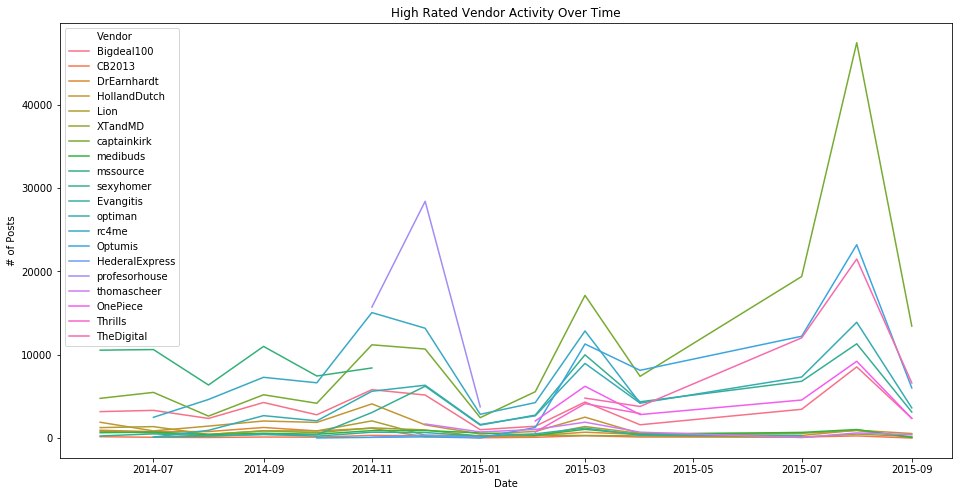

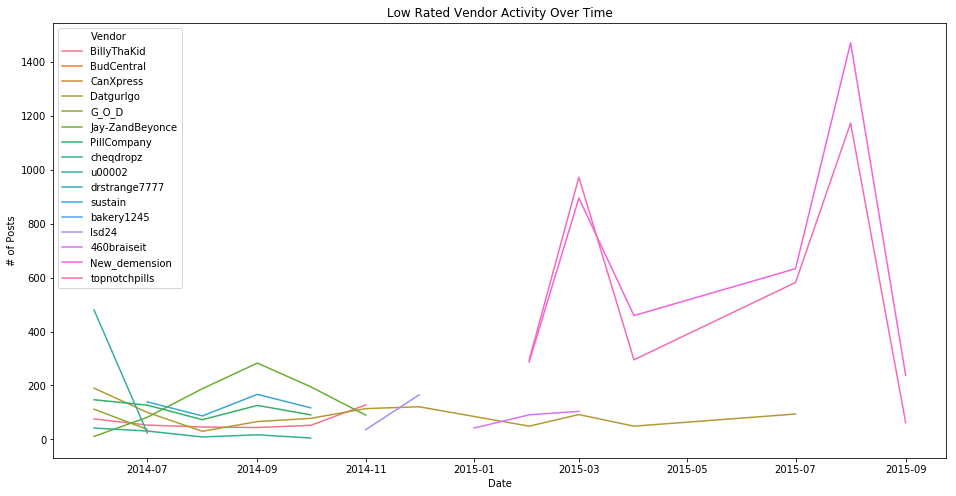

In [35]:
highrated = h.groupby('Date').apply(lambda x:x.groupby('Vendor').apply(lambda x:x['Items Listed'].sum())).reset_index()
highrated.columns = ['Date','Vendor','Items']
lowrated = l.groupby('Date').apply(lambda x:x.groupby('Vendor').apply(lambda x:x['Items Listed'].sum())).reset_index()
lowrated.columns = ['Date','Vendor','Items']

plt.figure(figsize=(16,8))
sns.lineplot(x = [dt.strptime(d, '%Y-%m') for d in highrated['Date']], y = "Items", hue = "Vendor", data = highrated).set_title('High Rated Vendor Activity Over Time')
plt.xlabel('Date')
plt.ylabel('# of Posts')

plt.figure(figsize=(16,8))
sns.lineplot(x = [dt.strptime(d, '%Y-%m') for d in lowrated['Date']], y = "Items", hue = "Vendor", data = lowrated).set_title('Low Rated Vendor Activity Over Time')
plt.xlabel('Date')
plt.ylabel('# of Posts')


# plt.savefig('highrate.png')
# plt.savefig('lowrate.png')

In [36]:
def getspan(name, df):
    tmp = df[df['Vendor'] == name]
    tmp.loc[:,'Date']=[dt.strptime(d, '%Y-%m') for d in tmp['Date']]
    result = tmp['Date'].iloc[-1] - tmp['Date'].iloc[0]
    return result

highspan = [getspan(name, highrated) for name in highrated['Vendor'].unique()]
lowspan = [getspan(name, lowrated) for name in lowrated['Vendor'].unique()]

/Users/family/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [37]:
highavg = highspan[0]
for i in range(1, len(highspan)):
    highavg += highspan[i]

lowavg = lowspan[0]
for i in range(1, len(lowspan)):
    lowavg += lowspan[i]

highavg = highavg/len(highspan)
lowavg = lowavg/len(lowspan)
highavg    # around 10.6 months

Timedelta('318 days 06:00:00')

In [38]:
lowavg     # around 3.3 months

Timedelta('100 days 15:00:00')

# Proportional stacked bar plot for whole Kaggle data

In [39]:
# Obtain data for the top active 20 vendors
sellers = agora['Vendor'].value_counts()
sellers = pd.DataFrame(sellers)
sellers = sellers.reset_index()

# Run one or the other
topseller_list = list(sellers.iloc[0:20, 0]) # compares top 20 active vendors to other vendors
topseller_list = list(high_20['Vendor']) # compares top 20 highest rated, active vendors to others

top20 = agora[agora.Vendor.isin(topseller_list)]

# Get data for the rest of the vendors
others = agora[~agora.Vendor.isin(topseller_list)]
others['Vendor'] = 'Rest of Vendors'

/Users/family/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [40]:
def get_categories_list(data):
    
    '''Takes in a subset of the Agora dataframe containing the column 'Category' and 
    returns a list of unique values in the 'Category' column.''' 
    
    categories = data['Category'].unique() 
    categories_list = categories.tolist()
    return categories_list

def get_dictionary(data):
    
    '''Takes in a subset of the Agora dataframe and returns a dictionary with values in the 
    'Vendor' column being the key.'''
    
    g = data.groupby('Vendor', as_index=False)
    d = dict(iter(g))
    return d

def get_keys(dictionary, data):
    
    '''If the dictionary does not contain keys matching the strings in the categories list,
    add the category as a key and set it to zero.'''
    
    for i in get_categories_list(data):
        if i not in dictionary['Category'].keys():
            dictionary['Category'][i] = 0
    return dictionary

In [41]:
def category_percent(Vendor, data):
    
    '''Takes a dataframe and a value in the 'Vendor' column and returns the percentages for each category 
    that makes up the vendor's total post count.'''
    
    df = pd.DataFrame(get_dictionary(data)[Vendor].Category.value_counts())
    diction = df.to_dict()
    diction = get_keys(diction, data)
    df = pd.DataFrame(diction)
    df = df.reset_index()
    df['percentage'] = pd.DataFrame((df.Category / df.Category.sum()))
    df['Vendor'] = Vendor
    df.columns = ['Category', 'Post Amount', 'Percentage', 'Vendor']
    df = df[['Category', 'Vendor', 'Post Amount', 'Percentage']]
    return df

other_vendors = category_percent('Rest of Vendors', others)

In [45]:
# Apply the category_percent() function to each value in the topseller_list
top20_vendors = pd.concat([category_percent(x, top20) for x in topseller_list])
top20_vendors = top20_vendors.reset_index(drop = True)

In [46]:
# combine the top20 vendor dataframe with the rest of the vendors dataframe
comb_df = pd.concat([top20_vendors, other_vendors])
comb_df.head(20)

,Category,Vendor,Post Amount,Percentage
0,Counterfeits,optiman,0,0.000000
1,Drugs,optiman,565,0.641317
2,Misc.,optiman,171,0.194098
3,Services,optiman,143,0.162316
4,Weapons,optiman,2,0.002270
5,Counterfeits,sexyhomer,805,0.936047
6,Drugs,sexyhomer,0,0.000000
7,Misc.,sexyhomer,0,0.000000
8,Services,sexyhomer,55,0.063953
9,Weapons,sexyhomer,0,0.000000


In [47]:
# get the unique categories of the combined df
categories = comb_df['Category'].unique() 
categories_list = categories.tolist()

# Group rows into a list
group = comb_df.groupby('Category')['Percentage'].apply(list)
values = pd.DataFrame(group)

In [48]:
# for stacked bar plot 
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models import Legend

In [49]:
output_file("stacked.html")

# Format the data into a dictionary in order to plot
vendors = list(comb_df['Vendor'].drop_duplicates(keep = 'first'))
categories = ["Counterfeits", "Drugs", "Misc.", "Services", "Weapons"]
colors = ['#3B0F6F', '#8C2980', '#DD4968', '#FD9F6C', '#FBFCBF']

data = {'vendors' : vendors,
        'Counterfeits' : values.loc['Counterfeits', 'Percentage'],
        'Drugs' : values.loc['Drugs', 'Percentage'],
        'Services' : values.loc['Services', 'Percentage'],
        'Weapons' : values.loc['Weapons', 'Percentage'],
        'Misc.' : values.loc['Misc.', 'Percentage']
}

source = ColumnDataSource(data)

p = figure(x_range = vendors, plot_height = 400, plot_width = 600, title = "Activity Levels of Vendors by Category",
           toolbar_location = None, tools = "hover", tooltips = "$name @vendors: @$name")

v = p.vbar_stack(categories, x = 'vendors', width = 0.9, color = colors, source = data)

# move the legend outside the plot
legend = Legend(items=[
    ("Counterfeits", [v[0]]),
    ("Drugs",   [v[1]]),
    ("Misc.", [v[2]]),
    ("Services", [v[3]]),
    ("Weapons", [v[4]])
], location=(0, -30))

p.add_layout(legend, 'right')

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.axis_label = "Vendor"
p.yaxis.axis_label = "Proportion"
p.xaxis.major_label_orientation = 1.2
p.legend.location = "center"

show(p)

## Interactive map to show popularity of categories by origin



In [ ]:
# country codes, we need to append this to our agora df so we can plot
countries = pd.read_csv("countries.csv", skipinitialspace = True)

agora = kaggle_agora_df(path)
# filling missing values
agora['Origin'] = agora.Origin.fillna('None')    

# banned words that break the loop, may need to fix later
banned_words = ['Me', 'Czech', 'West', 'United', 'Hong', 'u', 'US',
                'German', 'La', 'South', 'EU', ]

# loop that adds country code to matching origin in agora kaggle df
for i in range(0, len(agora)):
    if(countries['CODE'].str.match(agora.Origin[i]).sum()) > 0:
        if(agora.Origin[i] in banned_words):
            continue
        if(agora.Origin[i] == "UK"):
            agora.loc[i, 'CODE'] = "GBR"
            continue
        code_df = countries.loc[countries.loc[:, 'CODE'] == agora.Origin[i]]
        code_df = code_df.reset_index()
        agora.loc[i, 'CODE'] = code_df['CODE'][0]
    elif(countries['COUNTRY'].str.match(agora.Origin[i]).sum()) > 0:
        if(agora.Origin[i] in banned_words):
            continue
        code_df = countries.loc[countries.loc[:, 'COUNTRY'] == agora.Origin[i]]
        code_df = code_df.reset_index()
        agora.loc[i, 'CODE'] = code_df['CODE'][0]
    
        
def get_world_sellers(df, file): 
    """
        INPUT: a file path
        OUTPUT: a dataframe with cols['Vendor', 'Items Posted', 'Date']
        
        It gets a list of vendors for a file and then counts how 
        many listings they posted for a given day.
        
        It formats the above into a dataframe and also records 
        a the day of the data.
        
    """
    df = df[df['CODE'] == file]
    vendor = pd.DataFrame(df['Simple Category'].value_counts())
    vendor = vendor.reset_index()
    vendor['CODE'] = file
    return vendor


def get_all_world_sellers(df, codes):
    
    """
        INPUT: a list of file paths
        OUTPUT: a dataframe with cols['Vendor', 'Items Posted', 'Date']
        
        This function applies the above function to a list of file paths.
        It then formats the collection of dataframes into one that can
        be used for analysis.

    """
    
    vendors = get_world_sellers(df[df, codes[0]])
    for i in codes[1:]:
        temp = get_world_sellers(df[df, i])
        vendors = pd.concat([vendors, temp])
    return vendors 



# simplifying categories
agora['Simple Category'] = agora['Category'].apply(lambda x: categorize_text(x, kaggle_drugs, kaggle_serv, kaggle_guns, kaggle_fake))


# creating a df of countries and how much they sold per category
temp = pd.DataFrame()
vendors = pd.DataFrame()
codes = agora['CODE'].unique()
for i in range(1, len(codes)):
    temp = get_world_sellers(agora, codes[i])
    vendors = pd.concat([vendors, temp])
    
# cleaning the dataframe
country_sales = vendors.pivot_table(index = 'Code', columns = 'index', aggfunc = 'sum').fillna(0)
country_sales = country_sales.reset_index()
country_sales.columns = [' '.join(col).strip() for col in country_sales.columns.values]
country_sales.columns = ['CODE', 'Counterfeits', 'Drugs', 'Misc', 'Services', 'Weapons']
country_sales = country_sales.merge(countries, on = 'CODE')
country_sales = country_sales[['COUNTRY', 'CODE', 'Drugs', 'Services', 'Counterfeits', 'Weapons', 'Misc']]
#country_sales.to_csv("country_sales.csv")

In [50]:
# our plot
df = pd.read_csv("country_sales.csv", skipinitialspace = True)

trace_drugs = [go.Choropleth(
    locations = df['CODE'],
    z = df['Drugs'],
    text = df['COUNTRY'],
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.35, "rgb(40, 60, 190)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Quantity<br>'),
)]

layout_drugs = go.Layout(
    title = go.layout.Title(
        text = '2014-15 Agora Market Drug Sales by Country'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

trace_services = [go.Choropleth(
    locations = df['CODE'],
    z = df['Services'],
    text = df['COUNTRY'],
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.35, "rgb(40, 60, 190)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Quantity<br>'),
)]

layout_services = go.Layout(
    title = go.layout.Title(
        text = '2014-15 Agora Market Service Sales by Country'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

trace_counterfeits = [go.Choropleth(
    locations = df['CODE'],
    z = df['Counterfeits'],
    text = df['COUNTRY'],
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.35, "rgb(40, 60, 190)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Quantity<br>'),
)]

layout_counterfeits = go.Layout(
    title = go.layout.Title(
        text = '2014-15 Agora Market Counterfeit Sales by Country'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

trace_weapons = [go.Choropleth(
    locations = df['CODE'],
    z = df['Weapons'],
    text = df['COUNTRY'],
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.35, "rgb(40, 60, 190)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Quantity<br>'),
)]

layout_weapons = go.Layout(
    title = go.layout.Title(
        text = '2014-15 Agora Market Weapon Sales by Country'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

In [56]:
fig_services = go.Figure(data = trace_services, layout = layout_services)
py.iplot(fig_services, filename = 'd3-world-map')
# plotly.offline.plot(fig_services, filename='services.html')

/Users/family/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [58]:
fig_counterfeits = go.Figure(data = trace_counterfeits, layout = layout_counterfeits)
py.iplot(fig_counterfeits, filename = 'd3-world-map')
# plotly.offline.plot(fig_counterfeits, filename='counterfeits.html')

/Users/family/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [64]:
fig_weapons = go.Figure(data = trace_weapons, layout = layout_weapons)
py.iplot(fig_weapons, filename = 'd3-world-map')
# plotly.offline.plot(fig_weapons, filename='weapons.html')

/Users/family/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [62]:
fig_drugs = go.Figure(data = trace_drugs, layout = layout_drugs)
py.iplot(fig_drugs, filename = 'd3-world-map')
# plotly.offline.plot(fig_drugs, filename='drugs.html')

/Users/family/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

